Saving Lena.png to Lena (9).png


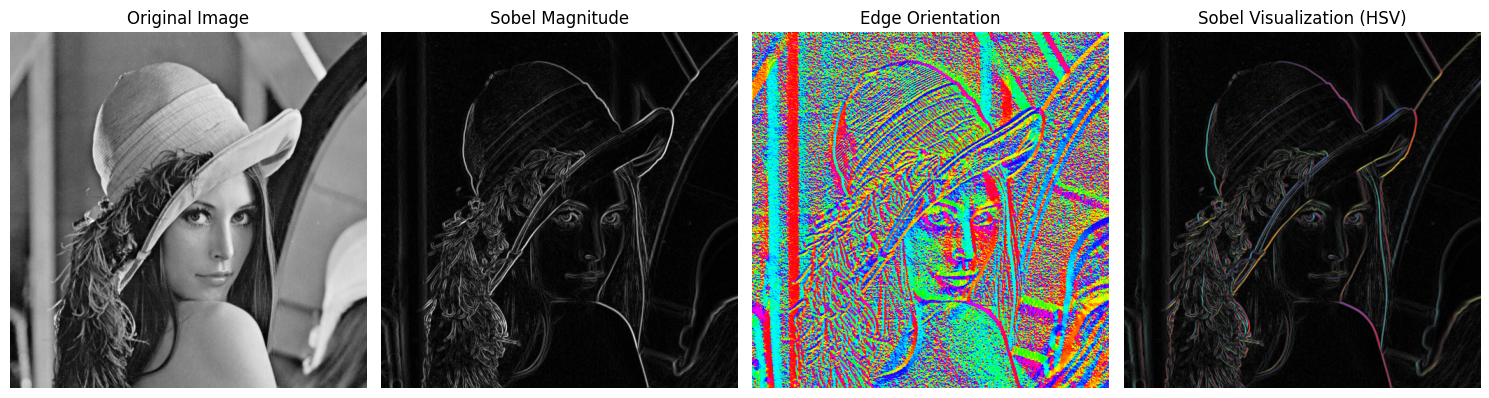

Magnitude shape: (510, 510)
Orientation shape: (510, 510)
Magnitude range: [0.0000, 1.0000]
Orientation range: [-3.1416, 3.1416]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

def convolve2D(image, kernel):
    m, n = kernel.shape
    y, x = image.shape
    y = y - m + 1
    x = x - n + 1
    result = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            result[i,j] = np.sum(image[i:i+m, j:j+n] * kernel)
    return result

#adding sobel filter and defining sobel kernels
def mySobelFilter(I):
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    #applying convolution
    Ix = convolve2D(I, Gx)
    Iy = convolve2D(I, Gy)

    #calculating magnitude and orientation
    mag = np.sqrt(Ix**2 + Iy**2)
    ori = np.arctan2(Iy, Ix)

    #normalizing magnitude to [0, 1]
    mag = normalize(mag)

    return mag, ori

def hsv_to_rgb(h, s, v):
    c = v * s
    x = c * (1 - abs((h / 60) % 2 - 1))
    m = v - c

    if 0 <= h < 60:
        r, g, b = c, x, 0
    elif 60 <= h < 120:
        r, g, b = x, c, 0
    elif 120 <= h < 180:
        r, g, b = 0, c, x
    elif 180 <= h < 240:
        r, g, b = 0, x, c
    elif 240 <= h < 300:
        r, g, b = x, 0, c
    else:
        r, g, b = c, 0, x

    return (r + m, g + m, b + m)

#visualizing edge orientation using HSV color mapping
def visualize_orientation(ori):
    h = (ori + np.pi) / (2 * np.pi) * 360
    s = np.ones_like(ori)
    v = np.ones_like(ori)

    height, width = ori.shape
    rgb_image = np.zeros((height, width, 3))

    for i in range(height):
        for j in range(width):
            rgb_image[i, j] = hsv_to_rgb(h[i, j], s[i, j], v[i, j])

    return rgb_image

def visualize_sobel(mag, ori):
    h = (ori + np.pi) / (2 * np.pi) * 360
    s = mag
    v = mag

    height, width = mag.shape
    rgb_image = np.zeros((height, width, 3))

    for i in range(height):
        for j in range(width):
            rgb_image[i, j] = hsv_to_rgb(h[i, j], s[i, j], v[i, j])

    return rgb_image

#loading and normalizing the image
uploaded = files.upload()
file_name = next(iter(uploaded))
I = np.array(Image.open(file_name).convert('L'))
I = normalize(I)

#applying sobel filter
mag, ori = mySobelFilter(I)

#visualizing orientation as an image
orientation_image = visualize_orientation(ori)

#visualizing results
rgb_image = visualize_sobel(mag, ori)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(I, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(mag, cmap='gray')
axs[1].set_title('Sobel Magnitude')
axs[1].axis('off')

axs[2].imshow(orientation_image)
axs[2].set_title('Edge Orientation')
axs[2].axis('off')

axs[3].imshow(rgb_image)
axs[3].set_title('Sobel Visualization (HSV)')
axs[3].axis('off')

plt.tight_layout()
plt.show()

print(f"Magnitude shape: {mag.shape}")
print(f"Orientation shape: {ori.shape}")
print(f"Magnitude range: [{mag.min():.4f}, {mag.max():.4f}]")
print(f"Orientation range: [{ori.min():.4f}, {ori.max():.4f}]")